# PyTorch Pocket Reference - Chapter 1

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1
False


In [3]:
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())

True
True


In [5]:
import urllib.request
url = "https://pytorch.tips/coffee"
fpath = "coffee.jpg"
urllib.request.urlretrieve(url,fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x130e2e500>)

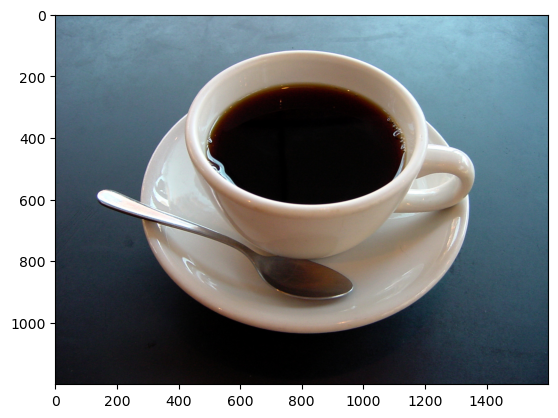

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open(fpath)
plt.imshow(image)

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img_tensor = transform(image)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [9]:
batch = img_tensor.unsqueeze(0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


In [13]:
from torchvision import models
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/pasathees/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [21]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps" if torch.backends.mps.is_available() else "cpu"
device = "cpu"
print(device)
device = torch.device(device)

model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

cpu
torch.Size([1, 1000])


In [23]:
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([967]) tensor([22.8618], grad_fn=<MaxBackward0>)


In [24]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'

urllib.request.urlretrieve(url, fpath)

with open(fpath) as f:
    classes = [line.strip() for line in f.readlines()]

print(classes[index])

967: 'espresso',


In [25]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.99555969238281


In [27]:
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item())

967: 'espresso', 87.99555969238281
968: 'cup', 7.688907623291016
504: 'coffee mug', 3.861560583114624
925: 'consomme', 0.35129523277282715
960: 'chocolate sauce, chocolate syrup', 0.050077494233846664
